# Contaminación en la India

In [39]:
import numpy as np # linear albegra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [148]:
data = pd.read_csv("../datasets/indian-polution/data.csv", encoding="ISO-8859-1")
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


In [152]:
data.fillna(0, inplace=True)
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0,0.0,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,0,Industrial Area,3.1,7.0,0.0,0.0,0,0.0,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0,0.0,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0,0.0,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,0,Industrial Area,4.7,7.5,0.0,0.0,0,0.0,1990-03-01


In [13]:
# Function to calculate so2 individual pollutant index (si)

def calculate_si(so2):
    si = 0
    if (so2 <= 40):
        si = so2*(50/40)
    if (so2 > 40 and so2 <= 80):
        si= 50 + (so2-40)*(50/40)
    if (so2 > 80 and so2 <= 380):
        si = 100 + (so2-80)*(100/300)
    if (so2 > 380 and so2 <= 800):
        si = 200 + (so2-380)*(100/800)
    if (so2 > 800 and so2 <= 1600):
        si = 300 + (so2-800)*(100/800)
    if (so2 > 1600):
        si = 400 + (so2-1600)*(100/800)
        
    return si

In [153]:
data["si"] = data["so2"].apply(calculate_si)
df = data[["so2", "si"]]
df.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [16]:
#Function to calculate no2 individual pollutant index(ni)

def calculate_ni(no2):
    ni=0
    if(no2 <= 40):
        ni = no2*50/40
    elif(no2 > 40 and no2 <= 80):
        ni = 50+(no2-14)*(50/40)
    elif(no2 > 80 and no2 <= 180):
        ni = 100+(no2-80)*(100/100)
    elif(no2 > 180 and no2 <= 280):
        ni = 200+(no2-180)*(100/100)
    elif(no2 > 280 and no2 <= 400):
        ni = 300+(no2-280)*(100/120)
    else:
        ni= 400+(no2-400)*(100/120)
        
    return ni

In [154]:
data["ni"] = data["no2"].apply(calculate_ni)
df = data[["no2", "ni"]]
df.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [22]:
#Function to calculate rspm individual pollutant index(rpi)

def calculate_rpi(rspm):
    rpi=0
    if(rspm <= 30):
        rpi = rspm*50/30
    elif(rspm > 30 and rspm <= 60):
        rpi = 50 + (rspm-30)*50/30
    elif(rspm > 60 and rspm <= 90):
        rpi = 100 + (rspm-60)*100/30
    elif(rspm > 90 and rspm <= 120):
        rpi = 200 + (rspm-90)*100/30
    elif(rspm > 120 and rspm <= 250):
        rpi = 300 + (rspm-120)*(100/130)
    else:
        rpi = 400 + (rspm-250)*(100/130)
        
    return rpi

In [155]:
data["rpi"] = data["rspm"].apply(calculate_rpi)
df = data[["rspm", "rpi"]]
df.tail()

,rspm,rpi
435737,143.0,317.692308
435738,171.0,339.230769
435739,0.0,0.000000
435740,0.0,0.000000
435741,0.0,0.000000


In [30]:
#Function to calculate spm individual pollutant index(spi)

def calculate_spi(spm):
    spi=0
    if(spm <= 100):
        spi = spm
    elif(spm > 100 and spm <= 250):
        spi= 100 + (spm-100)*(100/150)
    elif(spm > 250 and spm <= 350):
        spi=200+(spm-250)
    elif(spm > 350 and spm <= 450):
        spi = 300 + (spm-350)*(100/80)
    else:
        spi = 400 + (spm-430)*(100/80)
    
    return spi

In [156]:
data["spi"] = data["spm"].apply(calculate_spi)
df = data[["spm", "spi"]]
df[15:20]

,spm,spi
15,135.0,123.333333
16,80.0,80.000000
17,179.0,152.666667
18,58.0,58.000000
19,99.0,99.000000


In [32]:
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards

def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si > ni and si > spi and si > rpi):
        aqi=si
    if(spi > si and spi > ni and spi > rpi):
        aqi=spi
    if(ni > si and ni > spi and ni  >rpi):
        aqi=ni
    if(rpi > si and rpi > ni and rpi > spi):
        aqi = rpi
        
    return aqi

In [157]:
data["AQI"] = data.apply(lambda x: calculate_aqi(x["si"], x["ni"], x["spi"], x["rpi"]), axis=1)
df = data[["sampling_date", "state", "si", "ni", "spi", "rpi", "AQI"]]
df.head()

,sampling_date,state,si,ni,spi,rpi,AQI
0,February - M021990,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,February - M021990,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,February - M021990,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,March - M031990,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,March - M031990,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [36]:
df.state.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal',
       'andaman-and-nicobar-islands', 'Lakshadweep', 'Tripura'],
      dtype=object)

In [88]:
# Visualization of AQI across India

data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d") # data parse
data["year"] = data["date"].dt.year
data["year"] = data["year"].fillna(0.0).astype(int)

data = data[data["year"] > 0]

In [116]:
df = data[["AQI", "year", "state"]].groupby(["year"]).median().reset_index().sort_values(by="year", ascending=False)

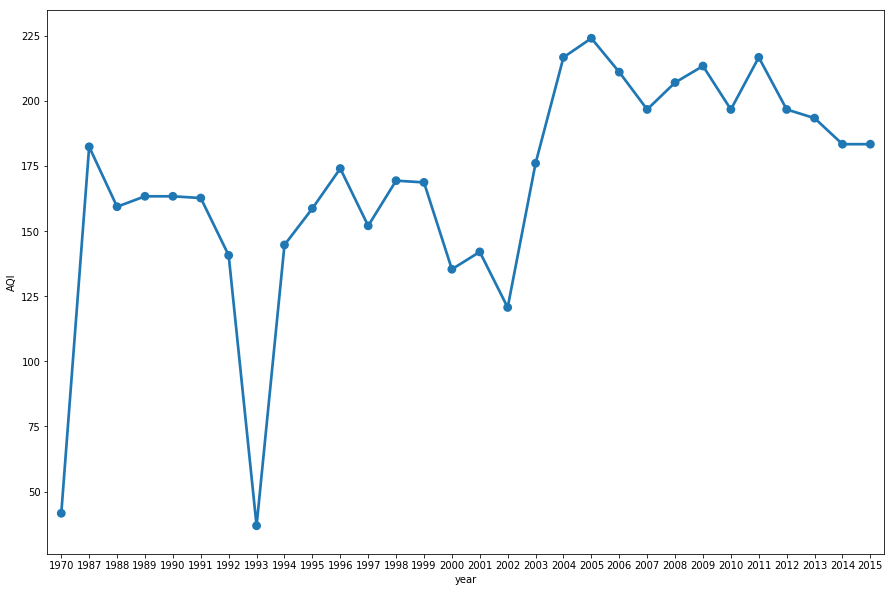

In [117]:
plt.figure(figsize=(15,10))
sns.pointplot(x="year", y="AQI", data=df)
#plt.plot(df["year"], df["AQI"], "b--o")

In [112]:
data[["date", "AQI"]].head(15)

,date,AQI
0,1990-02-01,21.750000
1,1990-02-01,8.750000
2,1990-02-01,35.625000
3,1990-03-01,18.375000
4,1990-03-01,9.375000
5,1990-03-01,32.125000
6,1990-04-01,21.375000
7,1990-04-01,10.875000
8,1990-04-01,28.750000
9,1990-05-01,11.125000


## Model

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [159]:
df = data[data["stn_code"] != "SAMP"]
x = df[["si", "ni", "spi", "rpi"]]
y = df["AQI"]

In [160]:
model = LinearRegression()

In [161]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [162]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [163]:
model.score(x_test, y_test)

0.8526567423405904

In [158]:
data.corr()

,so2,no2,rspm,spm,pm2_5,si,ni,rpi,spi,AQI
so2,1.000000,0.369450,0.097568,0.105536,-0.019861,0.969507,0.354501,0.111657,0.102319,0.186314
no2,0.369450,1.000000,0.317282,0.191618,0.018202,0.402077,0.947176,0.314963,0.190820,0.366995
rspm,0.097568,0.317282,1.000000,0.196845,0.032407,0.111637,0.304432,0.943887,0.210607,0.808813
spm,0.105536,0.191618,0.196845,1.000000,-0.078646,0.116740,0.188876,0.177804,0.993372,0.532239
pm2_5,-0.019861,0.018202,0.032407,-0.078646,1.000000,-0.021294,0.024837,0.040099,-0.074973,0.015569
si,0.969507,0.402077,0.111637,0.116740,-0.021294,1.000000,0.389163,0.127847,0.112747,0.205243
ni,0.354501,0.947176,0.304432,0.188876,0.024837,0.389163,1.000000,0.302536,0.188307,0.355701
rpi,0.111657,0.314963,0.943887,0.177804,0.040099,0.127847,0.302536,1.000000,0.178749,0.821591
spi,0.102319,0.190820,0.210607,0.993372,-0.074973,0.112747,0.188307,0.178749,1.000000,0.553907
AQI,0.186314,0.366995,0.808813,0.532239,0.015569,0.205243,0.355701,0.821591,0.553907,1.000000


In [168]:
x = df[["rspm", "spm", "rpi", "spi"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8701393096933686

In [171]:
df["prediction"] = model.predict(x)

In [173]:
df[["date", "AQI", "prediction"]].head(15)

,date,AQI,prediction
0,1990-02-01,21.750000,36.686000
1,1990-02-01,8.750000,36.686000
2,1990-02-01,35.625000,36.686000
3,1990-03-01,18.375000,36.686000
4,1990-03-01,9.375000,36.686000
5,1990-03-01,32.125000,36.686000
6,1990-04-01,21.375000,36.686000
7,1990-04-01,10.875000,36.686000
8,1990-04-01,28.750000,36.686000
9,1990-05-01,11.125000,36.686000
